# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [30]:
# Importando as bibliotecas e carregando os dados
from pandas import read_csv
from numpy import number, log
from seaborn import diverging_palette, clustermap, scatterplot

pr = read_csv('../previsao_de_renda.csv', index_col=0)
pr.drop(['index', 'mau'], axis=1, inplace=True)

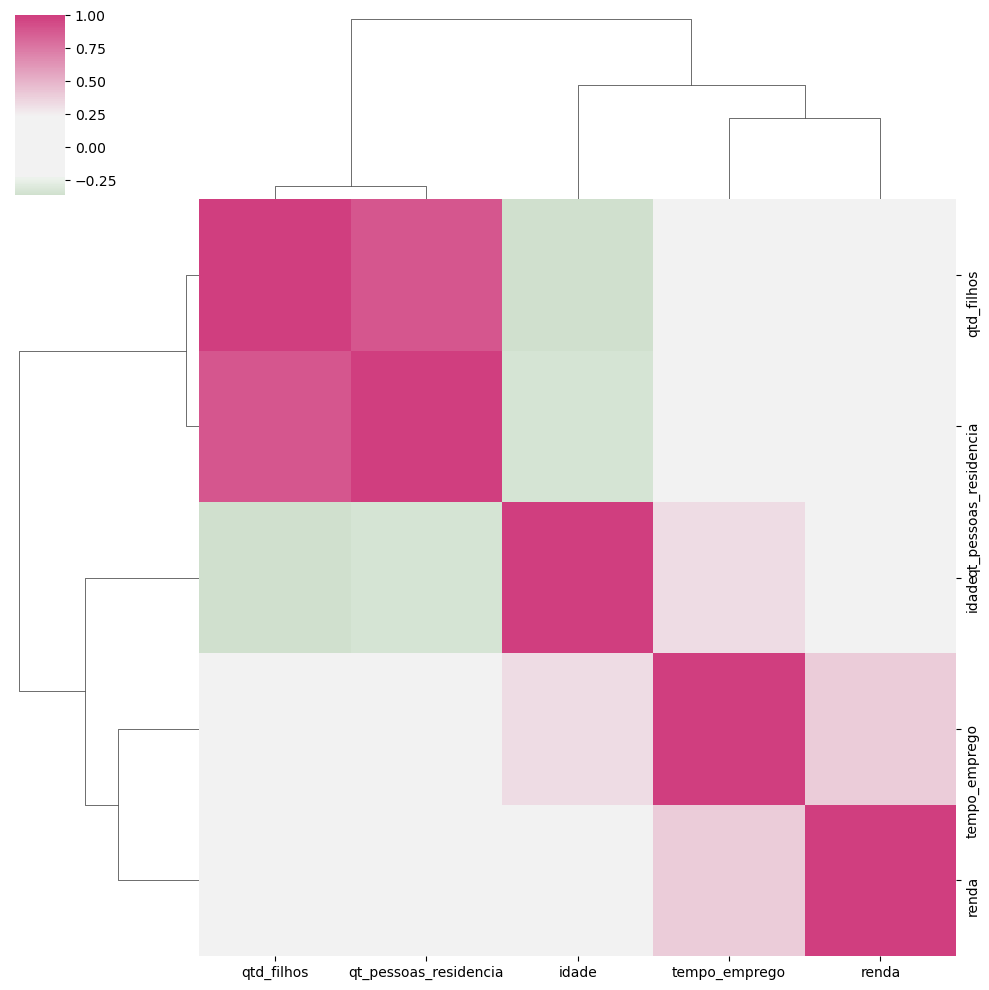

In [16]:
# Removendo colunas texto
numeric_pr = pr.select_dtypes(include=[number])

# Calculando a matriz de correlação
correlation_matrix_pr = numeric_pr.corr()

# Plotar a clustermap
cmap = diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
clustermap(
    correlation_matrix_pr,
    figsize=(10, 10),
    center=0,
    cmap=cmap,
)

Não consegui identificar muitos padrões nesse gráfico com os dados passados.
Porém, acredito que a uma relação entre o tempo de emprego, renda e quantidade de filhos.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

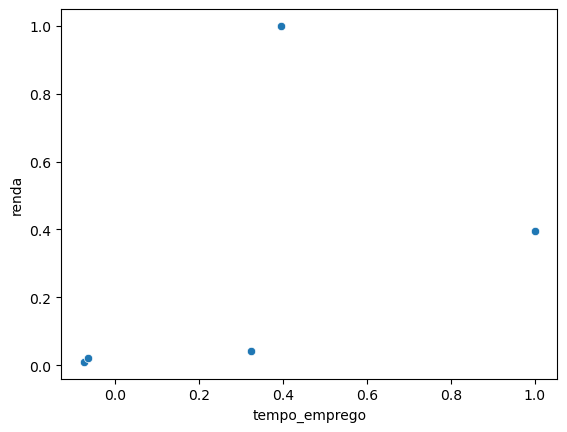

In [27]:
scatterplot(data=correlation_matrix_pr, x="tempo_emprego", y="renda")

<Axes: xlabel='renda', ylabel='qtd_filhos'>

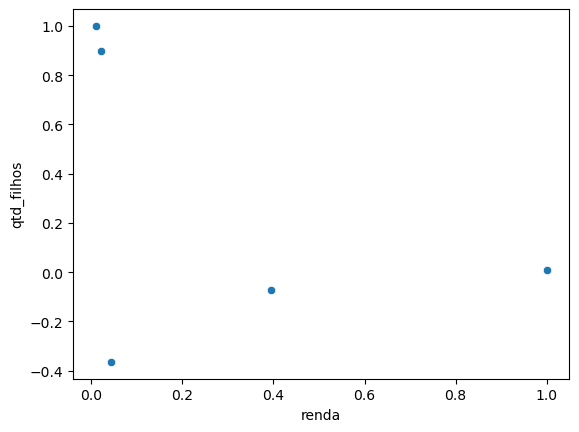

In [29]:
scatterplot(data=correlation_matrix_pr, x="renda", y="qtd_filhos")

3) Na su aopinião, há outliers na variável renda?

In [ ]:
Não

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [36]:
correlation_matrix_pr_log = correlation_matrix_pr.copy()
correlation_matrix_pr_log['log_renda'] = log(correlation_matrix_pr_log['renda'])

correlation_matrix_pr_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.904104,-0.726604,0.992771,-0.417351,-0.657784
idade,-0.904104,1.000000,0.510329,-0.899524,0.007886,0.273591
tempo_emprego,-0.726604,0.510329,1.000000,-0.730540,0.449806,0.755341
qt_pessoas_residencia,0.992771,-0.899524,-0.730540,1.000000,-0.420242,-0.645565
renda,-0.417351,0.007886,0.449806,-0.420242,1.000000,0.911203
log_renda,-0.657784,0.273591,0.755341,-0.645565,0.911203,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
Não